# Import modules

In [1]:
import pandas as pd
import numpy as np
import os
import datetime
import copy

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

# Mount google drive

In [3]:
# References:
# [1] https://towardsdatascience.com/different-ways-to-connect-google-drive-to-a-google-colab-notebook-pt-1-de03433d2f7a
# [2] https://stackoverflow.com/questions/54351852/accessing-shared-with-me-with-colab
# [3] https://stackoverflow.com/questions/53581278/test-if-notebook-is-running-on-google-colab

try:
    from google.colab import drive
    from google.colab import files
    IN_COLAB = True
except:
    IN_COLAB = False

if IN_COLAB:

    # mount google drive 
    drive.mount('/content/gdrive/', force_remount=True)

    #change directory
    try:
        os.chdir('/content/gdrive/MyDrive/MCED/TAAC_VC_PROJECT')

    except:
        os.chdir('/content/gdrive/MyDrive/TAAC_VC_PROJECT')

wdir = os.getcwd()

print(wdir)

h:\My Drive\MCED\TAAC_VC_PROJECT


# Loads SNIRH rainfall data

In [4]:
# path to SNHIRH folder
SNIRH_dir = wdir + '/SNIRH'

os.chdir(SNIRH_dir)

In [5]:
df_snirh= pd.read_csv("SNIRH_daily_rainfall.csv", index_col=0)
df_snirh.head()

,date,920685638,920685854,920685164,920685696,920685152,920685438,920685794,920685128,920684964,...,920685374,920685146,920685318,920685460,920686122,920685604,920685978,920686004,920685180,920684982
0,1950-10-01 09:00:00,NaN,NaN,15.9,9.4,NaN,NaN,NaN,NaN,6.0,...,2.4,NaN,5.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,1950-10-02 09:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,2.4,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,1950-10-03 09:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.2,...,0.0,NaN,0.4,NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,1950-10-04 09:00:00,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,1950-10-05 09:00:00,NaN,NaN,0.0,29.0,NaN,NaN,NaN,NaN,0.0,...,0.0,NaN,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [6]:
# converts date column to datetime format
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
df_snirh['date'] = pd.to_datetime(df_snirh['date'], format = '%Y-%m-%d %H:%M:%S')

In [7]:
# set date to be the index
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.set_index.html

df_snirh.set_index('date', inplace=True)

# Checking for missing values in the complete dataset

In [8]:
# https://datavizpyr.com/visualizing-missing-data-with-seaborn-heatmap-and-displot/
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import copy

# import matplotlib.dates as mdates

def plotMV (df, title, fname):
    plt.figure(figsize=(15,10))

    # sns.set()
    data = copy.deepcopy(df)
    data.index = df.index.strftime('%Y-%m-%d') # format date
    data = data.isna().transpose()
    
    ax = sns.heatmap(data = data,
                            cmap="gray_r",
                # cmap="YlGnBu",
                # xticklabels=x_axis_labels,
                cbar_kws={'label': 'Missing Data'}
                )
    ax.set_title(title)


    plt.savefig(fname, dpi=100)

In [9]:
date_init = df_snirh.index[0].strftime('%Y-%m-%d')
date_end = df_snirh.index[-1].strftime('%Y-%m-%d')

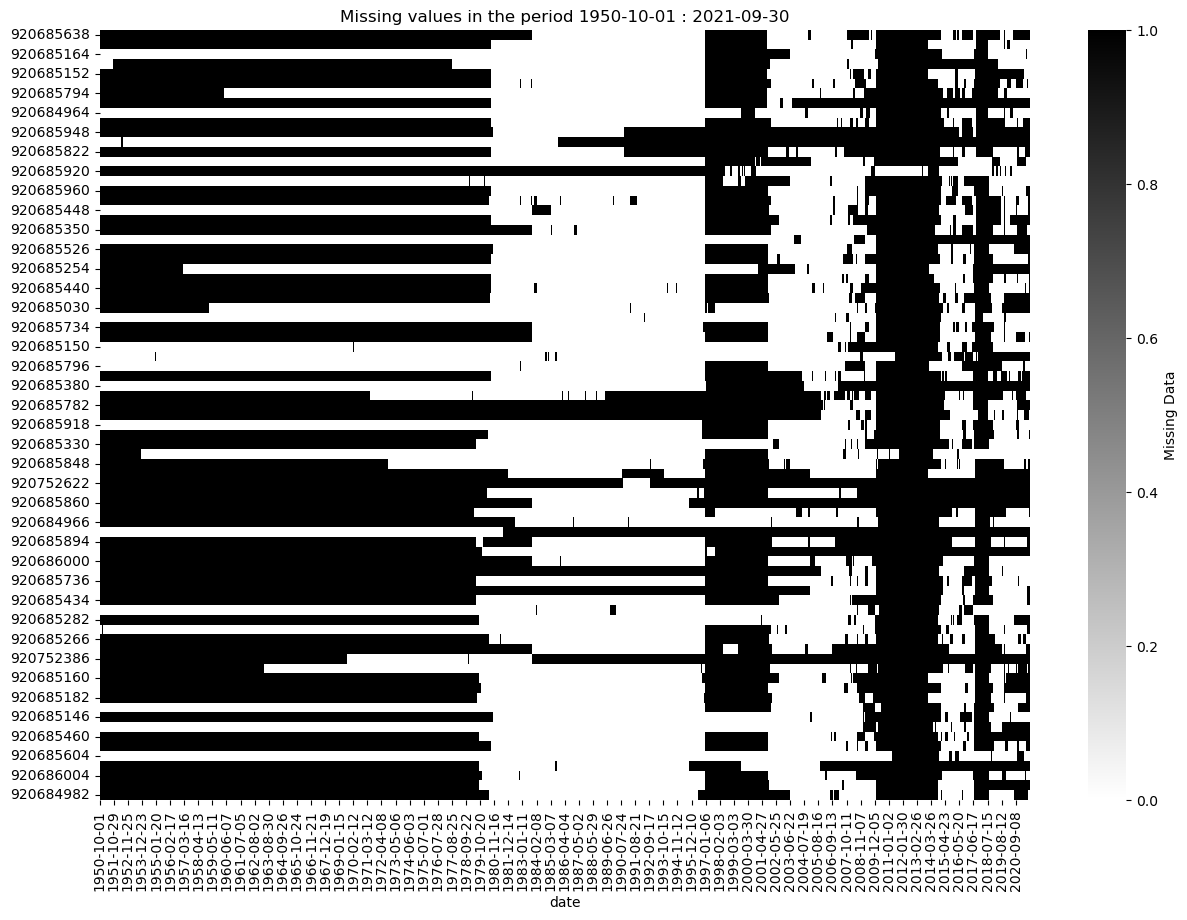

In [10]:
title = f"Missing values in the period {date_init[:10]} : {date_end[:10]}"
fname = "df_snirh_MV.png"
plotMV (df_snirh, title, fname)

In [11]:
df_snirh['row_count'] = df_snirh.apply(lambda x: x.count(), axis=1)

In [12]:
df_snirh.describe()["row_count"]

count    25933.000000
mean        37.525431
std         21.774891
min          0.000000
25%         21.000000
50%         27.000000
75%         63.000000
max         71.000000
Name: row_count, dtype: float64

In [13]:
consecutive = np.zeros(len(df_snirh))
consecutive[1] = 0

In [14]:
#selectin 40, wich is ceil(mean)+1 as threshold and counting consecuitve daily obs with at least 40 working station
for i in range(1,len(df_snirh)):
    if (df_snirh.iloc[i]["row_count"] >= 40):
        consecutive[i] = consecutive[i-1] +1
        

In [15]:
df_snirh["consecutive"] = consecutive

In [16]:
df_snirh.describe()["consecutive"]
#the longest period appears to be 6302 days

count    25933.000000
mean       867.095631
std       1571.160485
min          0.000000
25%          0.000000
50%          0.000000
75%       1080.000000
max       6171.000000
Name: consecutive, dtype: float64

In [17]:
df_snirh[df_snirh["consecutive"] == 6302].index

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [18]:
 df_snirh[df_snirh["consecutive"] == 6302].index-datetime.timedelta(6301)
#starting day of the period

DatetimeIndex([], dtype='datetime64[ns]', name='date', freq=None)

In [19]:
new_df = df_snirh.loc['1979-10-01 09:00:00':'1996-12-31 09:00:00']

In [20]:
new_df.describe()["row_count"]

count    6302.000000
mean       65.584418
std         6.214371
min        38.000000
25%        64.000000
50%        67.000000
75%        69.000000
max        71.000000
Name: row_count, dtype: float64

In [21]:
new_df2 = new_df.dropna(axis = 1)

In [22]:
new_df2.shape[1]

17

In [23]:
new_df2

,920685164,920685696,920685794,920684964,920685228,920685254,920685150,920685862,920685886,920685736,920685434,920685374,920685318,920685604,920685180,row_count,consecutive
date,,,,,,,,,,,,,,,,,
1979-10-01 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,0.0
1979-10-02 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39,0.0
1979-10-03 09:00:00,0.9,0.2,0.0,0.0,0.0,12.3,0.0,1.9,0.0,0.0,0.0,0.0,0.0,1.5,1.3,38,0.0
1979-10-04 09:00:00,44.7,34.0,31.3,18.1,34.3,18.0,28.7,23.6,27.8,39.2,17.4,14.5,0.0,23.2,19.0,39,0.0
1979-10-05 09:00:00,4.5,4.0,5.3,4.1,0.0,7.1,3.6,0.6,4.9,0.2,0.8,0.0,0.0,1.7,0.7,39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1996-12-27 09:00:00,0.0,0.0,0.0,0.0,9.6,0.0,0.0,0.0,10.6,0.0,0.0,0.0,0.0,0.0,0.0,58,6167.0
1996-12-28 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,13.2,0.0,0.0,0.0,0.0,0.0,0.0,58,6168.0
1996-12-29 09:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.1,0.0,0.7,0.0,0.0,0.0,7.3,58,6169.0


# Stations that have >95% complete records

In [24]:
date_init= '1985-10-01 09:00:00'
date_end = '1995-09-30 09:00:00'
df_snirh2 = df_snirh.loc[date_init:date_end]

In [25]:
stations = df_snirh2.columns.to_list()[0:-3]

In [26]:
percentage_of_nan = {}
for station in stations:
    percentage_of_nan[station] = df_snirh2[station].isna().sum()/len(df_snirh2)

In [27]:
greater_of_95 = {key:value for (key,value) in percentage_of_nan.items() if value <= 0.05}

In [28]:
len(greater_of_95)

64

In [29]:
# https://www.geeksforgeeks.org/python-converting-all-strings-in-list-to-integers/
l_gt_95 = list(greater_of_95.keys())
# l_gt_95

In [30]:
# dataframe with the stations that have more than 95% of complete records
df_snirh_95 = df_snirh[list(greater_of_95)].loc[date_init:date_end]
len(df_snirh_95.columns)

64

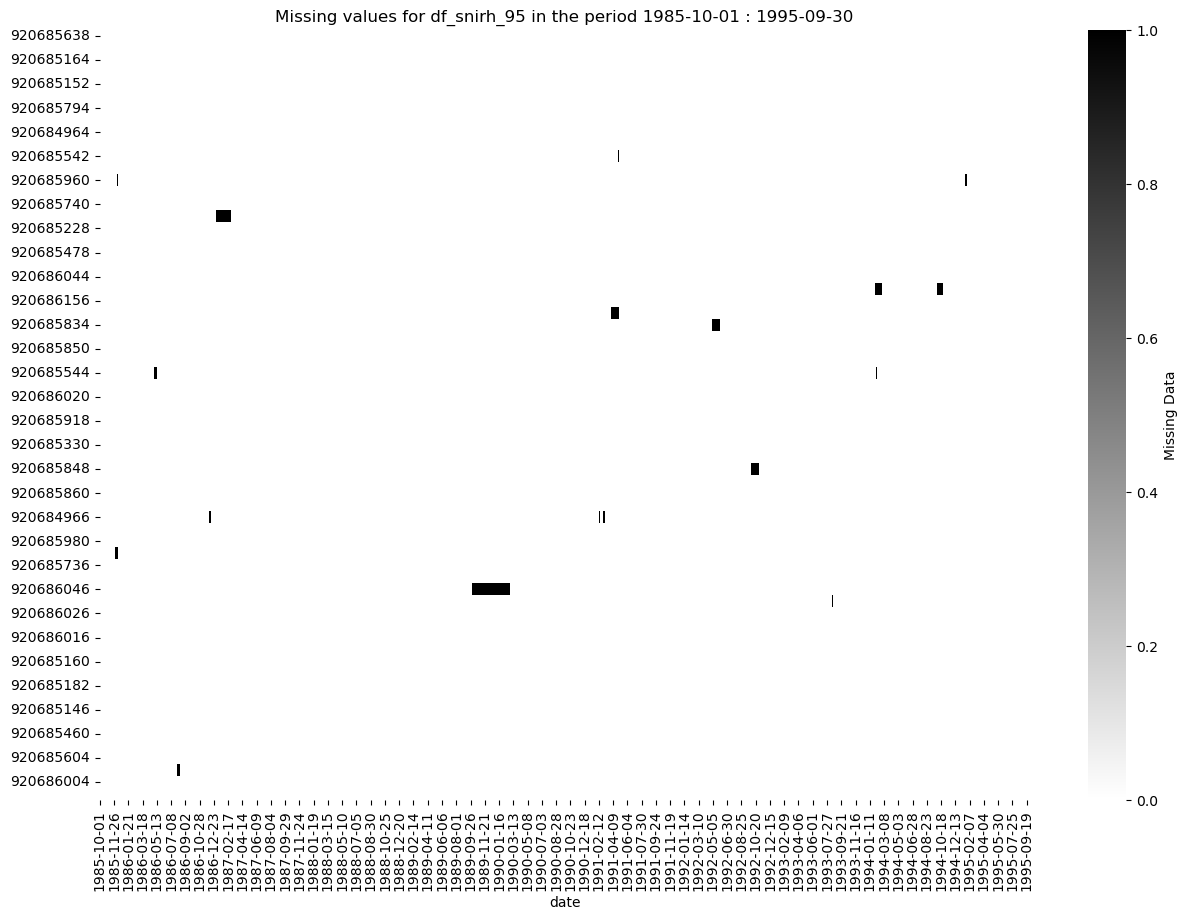

In [31]:
title = f"Missing values for df_snirh_95 in the period {date_init[:10]} : {date_end[:10]}"
fname = "df_snirh_95_MV.png"
plotMV (df_snirh_95, title, fname)

In [32]:
# saves to file
df_snirh_95.to_csv('df_snirh_95.csv')

# Installs libraries in colab

In [33]:
# https://colab.research.google.com/drive/1We-LMiSeucESsiB1tmvL9nZrntyWsri-#scrollTo=xIXl9KBOxVKE

if IN_COLAB:
  !pip install --upgrade geopandas
  !pip install --upgrade pyshp
  !pip install --upgrade shapely
  !pip install --upgrade descartes
  !pip install --upgrade pygeos

In [34]:
#  Installing rtree
# https://stackoverflow.com/questions/48293601/how-to-install-libspatialindex-on-google-colaboratory
# https://colab.research.google.com/drive/1N7i9zmOwVcUzd4eHWZux4p_WTBMZHi8C#scrollTo=4hkAY8dGGJAy

if IN_COLAB:
  !apt-get install -qq curl g++ make
  !curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz
  import os
  os.chdir('spatialindex-src-1.8.5')
  !./configure
  !make
  !make install
  !pip install rtree
  !ldconfig

# Plot stations with >95% complete records

In [35]:
# path for shapefiles folder
SHP_dir = wdir + '/SHP'

# change directory
os.chdir(SHP_dir)

In [36]:

import geopandas as gpd

#loads the river basin limits, stations and polygons
gdf_Mondego_tp = gpd.read_file('gdf_Mondego_tp.shp')
gdf_Mondego_tp.id = gdf_Mondego_tp.id.astype('int').astype('str')

gdf_Mondego_stations = gpd.read_file('gdf_Mondego_stations.shp')
gdf_Mondego_stations.id = gdf_Mondego_stations.id.astype('int').astype('str')

gdf_Mondego_rb = gpd.read_file('gdf_Mondego_rb.shp')

print(gdf_Mondego_rb.area/1e6)

0    6639.987883
dtype: float64


In [37]:
gdf_gt_95_tp = gdf_Mondego_tp[gdf_Mondego_tp['id'].isin(l_gt_95)]
gdf_gt_95_stations = gdf_Mondego_stations[gdf_Mondego_stations['id'].isin(l_gt_95) ]

Text(0.5, 1.0, 'Weather stations with 95% complete records 1985-10-01/1995-09-30')

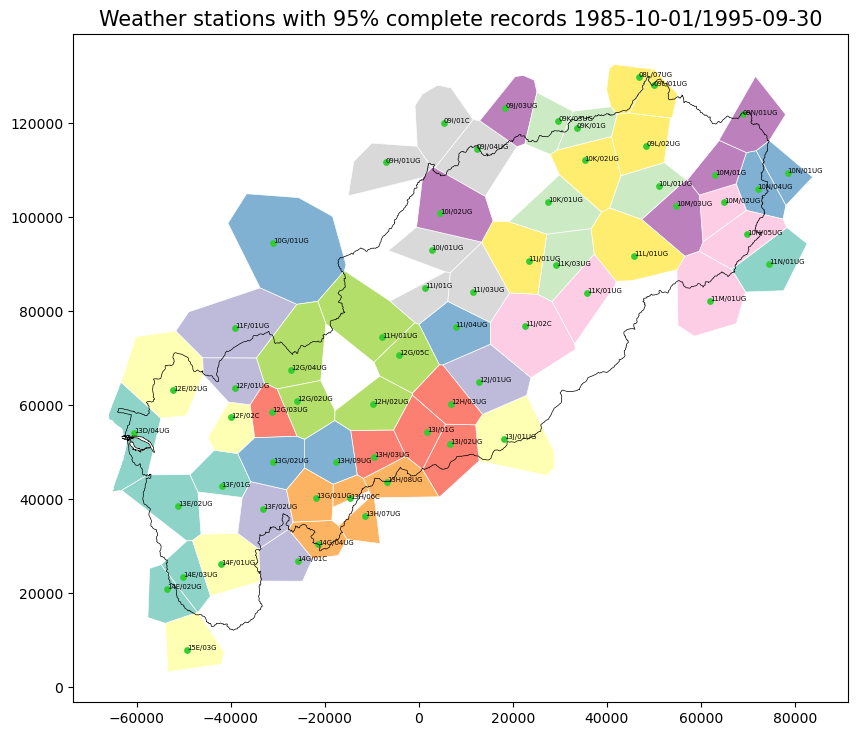

In [38]:
# https://gis.stackexchange.com/questions/314949/creating-square-buffers-around-points-using-shapely
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
# plt.style.use('bmh')

# Plot data
gdf_gt_95_tp.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
gdf_gt_95_stations.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 15)
gdf_Mondego_rb.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 0.5)

# Iterate through each rainfall train point to add a label with its value to the plot
for index, row in gdf_gt_95_stations.iterrows():
    ax.annotate(row.codigo, (row.geometry.x, row.geometry.y), fontsize=5)

# Set title
ax.set_title(f'Weather stations with 95% complete records {date_init[0:10]}/{date_end[0:10]}', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# plt.savefig('grid_overlaid.png')

# Checks stations with incomplete dataset

In [39]:
df = pd.DataFrame([percentage_of_nan]).transpose().reset_index()
df.columns = ['id','perc_nan']

In [40]:
min(df['perc_nan'])

0.0

In [41]:
df_incomplete_stations = pd.DataFrame([percentage_of_nan]).transpose().reset_index()
df_incomplete_stations.columns = ['id','perc_nan']
df_incomplete_stations = df_incomplete_stations[df_incomplete_stations['perc_nan']>0]
df_incomplete_stations = df_incomplete_stations[df_incomplete_stations['perc_nan']<0.05]
df_incomplete_stations.sort_values(by = 'perc_nan', ascending = False).head()


,id,perc_nan
59,920686046,0.041347
20,920685350,0.016703
26,920685440,0.012870
44,920685848,0.008762
29,920685834,0.008488


In [42]:
# list of stations with incomplete dataset
l_incomplete_stations = df_incomplete_stations['id'].tolist()
len(l_incomplete_stations)


16

In [43]:
gdf_incomplete_tp = gdf_Mondego_tp[gdf_Mondego_tp['id'].isin(l_incomplete_stations)]
gdf_incomplete_stations = gdf_Mondego_stations[gdf_Mondego_stations['id'].isin(l_incomplete_stations)]

Text(0.5, 1.0, 'Weather stations with incomplete records 1985-10-01/1995-09-30')

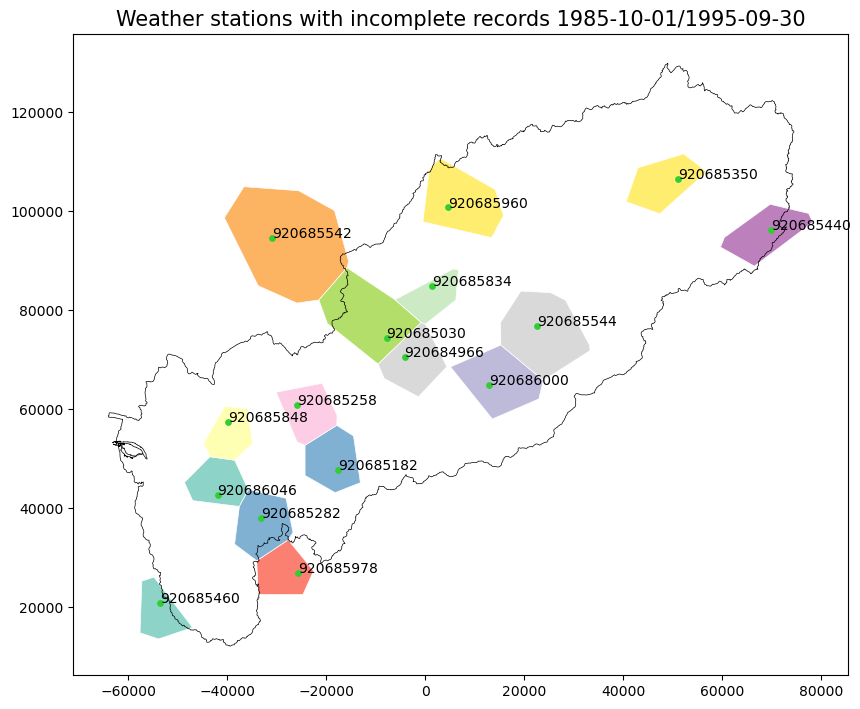

In [44]:
# https://gis.stackexchange.com/questions/314949/creating-square-buffers-around-points-using-shapely
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
# plt.style.use('bmh')

# Plot data
gdf_incomplete_tp.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
gdf_incomplete_stations.plot(ax = ax, marker = 'o', color = 'limegreen', markersize = 15)
gdf_Mondego_rb.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 0.5)

# Iterate through each rainfall train point to add a label with its value to the plot
for index, row in gdf_incomplete_stations.iterrows():
    ax.annotate(row.id, (row.geometry.x, row.geometry.y), fontsize=10)

# Set title
ax.set_title(f'Weather stations with incomplete records {date_init[0:10]}/{date_end[0:10]}', fontdict = {'fontsize': '15', 'fontweight' : '3'})

# plt.savefig('grid_overlaid.png')

# Stations with complete dataset

In [45]:
df_complete_stations = pd.DataFrame([percentage_of_nan]).transpose().reset_index()
df_complete_stations.columns = ['id','perc_nan']
df_complete_stations = df_complete_stations[df_complete_stations['perc_nan']==0]
df_complete_stations.sort_values(by = 'perc_nan', ascending = False).head()
df_complete_stations.head()

,id,perc_nan
0,920685638,0.0
1,920685854,0.0
2,920685164,0.0
3,920685696,0.0
4,920685152,0.0


In [46]:
# list of stations with complete dataset
l_complete_stations = df_complete_stations['id'].tolist()
len(df_complete_stations)


48

In [47]:
# list of stations to drop from the dataset
l_drop_stations = set(df_snirh.columns.tolist()) - set(l_complete_stations)
    

In [48]:
import copy


# copy original dataframe
df_snirh_complete = copy.deepcopy(df_snirh) 

# drop unwanted statoins
df_snirh_complete = df_snirh_complete.drop(l_drop_stations, axis = 1)
# slices to the desired period of time
df_snirh_complete = df_snirh_complete.loc[date_init:date_end]
df_snirh_complete.head()

,920685638,920685854,920685164,920685696,920685152,920685438,920685794,920685128,920684964,920685348,...,920685428,920685160,920685256,920685374,920685146,920685318,920686122,920685604,920686004,920685180
date,,,,,,,,,,,,,,,,,,,,,
1985-10-01 09:00:00,0.0,0.0,1.8,0.0,0.0,0.7,0.6,0.0,2.1,0.0,...,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985-10-02 09:00:00,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,3.4,0.0,...,0.1,0.0,5.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985-10-03 09:00:00,4.0,4.6,4.6,1.5,1.2,1.2,4.4,0.0,5.2,0.0,...,6.3,7.3,2.5,4.3,4.0,0.0,9.5,12.5,2.0,2.9
1985-10-04 09:00:00,19.4,4.0,14.8,6.0,7.1,6.2,20.6,12.0,0.0,10.5,...,13.4,2.9,0.3,7.3,9.0,0.0,5.0,5.4,2.5,2.6
1985-10-05 09:00:00,0.0,0.0,0.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.8,0.0,0.0,0.0,1.9,0.0,0.0,2.5


In [49]:
# checks if there are still nan
df_snirh_complete.isna().any().all()

False

In [50]:
# saves to file
df_snirh_complete.to_csv('df_snirh_complete.csv')

# Thiessen polygons for stations with >95% complete records

In [51]:
# https://spatialreference.org/ref/epsg/3763/
# proj = 'EPSG:3763'
proj = 3763


In [52]:
from scipy.spatial import Voronoi, voronoi_plot_2d
from shapely.geometry import Polygon, Point

def Thiessen_Coefficients(gdf_stations, gdf_boundary, proj):

    # Get X and Y coordinates of rainfall points
    x_rain = gdf_stations["geometry"].x
    y_rain = gdf_stations["geometry"].y

    # Create list of XY coordinate pairs
    coords_rain = [list(xy) for xy in zip(x_rain, y_rain)]

    # Extend limits of the basin by using buffer
    buffer = gdf_boundary.buffer(10000)

    # Get extent of buffered input feature
    min_x_tp, min_y_tp, max_x_tp, max_y_tp = buffer.total_bounds

    # Use extent to create dummy points and add them to list of coordinates
    coords_tp = coords_rain + [[min_x_tp, min_y_tp], [max_x_tp, min_y_tp],
                                    [max_x_tp, max_y_tp], [min_x_tp, max_y_tp]]

    # Compute Voronoi diagram
    tp = Voronoi(coords_tp)

    # Create empty list of hold Voronoi polygons
    tp_poly_list = []

    # Create a polygon for each region
    # 'regions' attribute provides a list of indices of the vertices (in the 'vertices' attribute) that make up the region
    # Source: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.Voronoi.html
    for region in tp.regions:

        # Ignore region if -1 is in the list (based on documentation)
        if -1 in region:

            # Return to top of loop
            continue

        # Otherwise, pass
        else:
            pass

        # Check that region list has values in it
        if len(region) != 0:

            # Create a polygon by using the region list to call the correct elements in the 'vertices' attribute
            tp_poly_region = Polygon(list(tp.vertices[region]))

            # Append polygon to list
            tp_poly_list.append(tp_poly_region)

        # If no values, return to top of loop
        else:
            continue

    # Create GeoDataFrame from list of polygon regions
    tp_polys = gpd.GeoDataFrame(tp_poly_list, columns = ['geometry'], crs = proj)


    # If rainfall point within the polygon, assign that rainfall value to the polygon
    tp_polys = gpd.sjoin(gdf_stations, tp_polys, how = "right", op = 'within')

    # Drop un-needed column
    tp_polys = tp_polys.drop(["url_left","url_right","index_left"], axis = 1)

    # Display head of attribute table
    # print("Attribute Table: Thiessen Polygon Interpolated Values")
    # display(tp_polys.head())

    # Clip polygon regions to the basin boundary
    gdf_tp_polys_clipped = gpd.clip(tp_polys, gdf_boundary)

    # Area of each polygon inside the basin
    gdf_tp_polys_clipped['area'] = gdf_tp_polys_clipped.area

    #Thiesse coefficients
    gdf_tp_polys_clipped['ThCoef'] = gdf_tp_polys_clipped['area'] / gdf_tp_polys_clipped['area'].sum() 

    return gdf_tp_polys_clipped

In [53]:
# Computes the Thiessen polygons and Thiessen coefficients for the stations with >95% of records
gdf_gt_95_tp = Thiessen_Coefficients(gdf_gt_95_stations, gdf_Mondego_rb, proj)

# Checks stations which have small contribution to basin area

In [54]:
ThCoef_min = 0.001

gdf_small_area_tp = gdf_gt_95_tp[gdf_gt_95_tp['ThCoef'] < ThCoef_min]
gdf_small_area_stations = gdf_gt_95_stations[gdf_gt_95_stations['id'].isin(gdf_small_area_tp['id'])]

len(gdf_small_area_tp)

8

In [55]:
gdf_small_area_tp.head()

,id,codigo,Name,Elevation,Basin,geometry,area,ThCoef
9,920685152,09J/03UG,CALDE,505.0,VOUGA/RIBEIRAS COSTEIRAS,"POLYGON ((22208.982 114076.249, 19156.601 1162...",6.463457e+06,0.000973
12,920685164,09H/01UG,CAMPIA,448.0,VOUGA/RIBEIRAS COSTEIRAS,"MULTIPOLYGON (((2747.976 110540.456, 1527.317 ...",9.046346e+05,0.000136
13,920685696,09I/01C,SÃO PEDRO DO SUL,182.0,VOUGA/RIBEIRAS COSTEIRAS,"POLYGON ((2747.976 110540.456, 2109.835 111479...",5.468756e+05,0.000082
20,920685638,08L/07UG,QUINTA DA FUMADINHA,803.0,VOUGA/RIBEIRAS COSTEIRAS,"MULTIPOLYGON (((44725.852 122168.344, 42207.99...",3.315640e+06,0.000499
23,920685644,11N/01UG,RAMELA,667.0,TEJO,"POLYGON ((66510.287 88941.494, 67286.431 89525...",4.986171e+05,0.000075


Text(0.5, 1.0, "Weather stations with less than 0.1% of the basin's area")

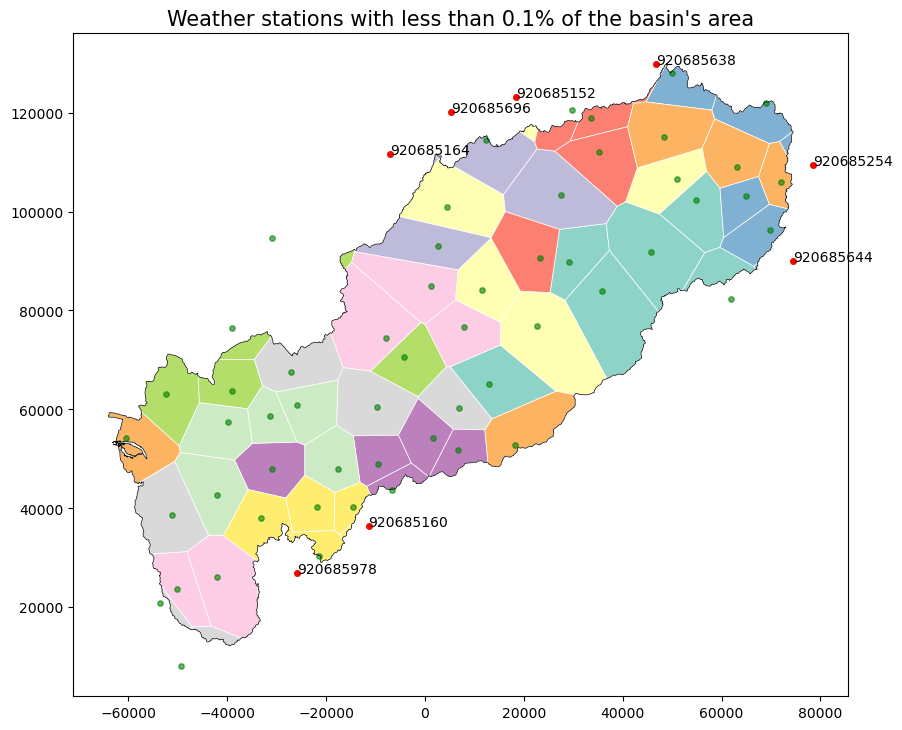

In [56]:
# https://gis.stackexchange.com/questions/314949/creating-square-buffers-around-points-using-shapely
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create subplots
fig, ax = plt.subplots(1, 1, figsize = (10, 10))

# Stylize plots
# plt.style.use('bmh')

# Plot data
# gdf_tp_polys_clipped.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
gdf_gt_95_tp.plot(ax = ax, cmap = 'Set3', edgecolor = 'white', linewidth = 0.5)
gdf_gt_95_stations.plot(ax = ax, marker = 'o', color = 'green', markersize = 15, alpha = 0.6)
gdf_small_area_stations.plot(ax = ax, marker = 'o', color = 'red', markersize = 15)
gdf_Mondego_rb.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 0.5)
# Mondego_buffer.plot(ax = ax, color = 'none', edgecolor = 'black', linewidth = 0.5)

# Iterate through each rainfall train point to add a label with its value to the plot
for index, row in gdf_small_area_stations.iterrows():
    ax.annotate(row.id, (row.geometry.x, row.geometry.y), fontsize=10)

# Set title
ax.set_title(f"Weather stations with less than {ThCoef_min*100}% of the basin's area", fontdict = {'fontsize': '15', 'fontweight' : '3'})

# plt.savefig('grid_overlaid.png')

In [57]:
# small_area = gdf_small_area_tp['id'].astype('str').tolist()
small_area = gdf_small_area_tp['id']

In [58]:
df_snirh_small_area = df_snirh[list(small_area)].loc[date_init:date_end]

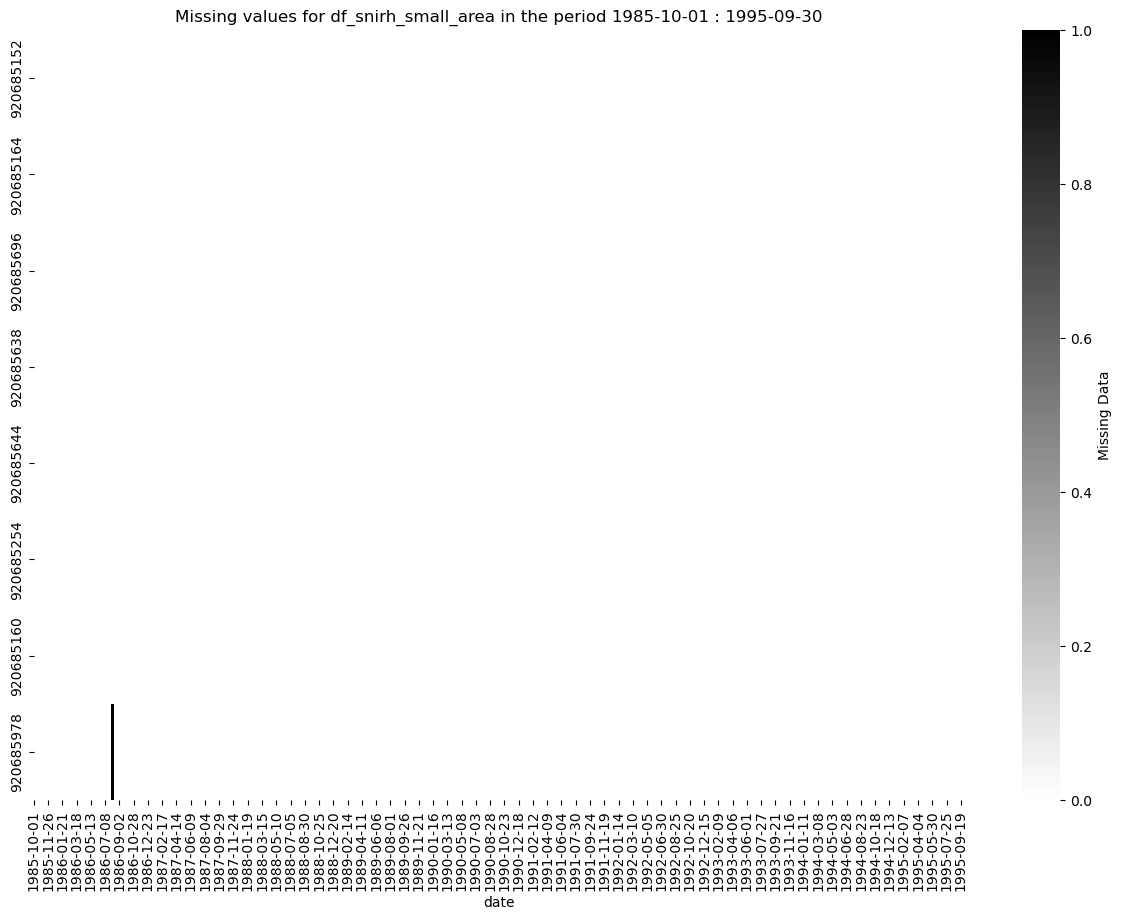

In [59]:
# plots missing values
title = f"Missing values for df_snirh_small_area in the period {date_init[:10]} : {date_end[:10]}"
fname = "df_snirh_small_area_MV.png"
plotMV (df_snirh_small_area, title, fname)

Since the stations that have small contribution to the basin ara have almost complete records, we will not eliminate them.

# Compute the Thiessen coefficients for each date

## Idenfity days with missing values in some stations

In [60]:
nrows_gt_95 = len(greater_of_95)

In [61]:
# count number of NA per row
# https://datascience.stackexchange.com/questions/12645/how-to-count-the-number-of-missing-values-in-each-row-in-pandas-dataframe
df_snirh_95['row_count'] = df_snirh_95.apply(lambda x: x.count(), axis=1)

In [62]:
# dataframe with rows with missing values
df_snirh_95_nan_rows = df_snirh_95[df_snirh_95['row_count'] < nrows_gt_95]
# drop unwanted column
df_snirh_95_nan_rows = df_snirh_95_nan_rows.drop('row_count', axis =1)

nan_rows = len(df_snirh_95_nan_rows)

print(f"There are {nan_rows} out of {len(df_snirh_95)} rows with missing values, representing {round(nan_rows/len(df_snirh_95) * 100, 1)}% of the dataset.")

There are 410 out of 3652 rows with missing values, representing 11.2% of the dataset.


In [63]:
gdf_gt_95_tp.head()

,id,codigo,Name,Elevation,Basin,geometry,area,ThCoef
0,920686000,12J/01UG,CÔJA,245.0,MONDEGO,"POLYGON ((26520.785 63649.444, 13548.270 58054...",1.643147e+08,0.024746
1,920685796,11K/01UG,SEIA,447.0,MONDEGO,"POLYGON ((28331.575 82059.964, 37325.228 92168...",2.691857e+08,0.040540
2,920685918,11M/01UG,VALHELHAS,512.0,TEJO,"POLYGON ((66510.287 88941.494, 66901.529 88308...",5.896362e+07,0.008880
3,920685478,10M/03UG,MESQUITELA,437.0,MONDEGO,"POLYGON ((60441.753 94738.581, 59654.429 92782...",1.229799e+08,0.018521
4,920686020,11K/03UG,PARANHOS DA BEIRA,402.0,MONDEGO,"POLYGON ((37325.228 92168.223, 28331.575 82059...",1.165772e+08,0.017557


## Days with values for all stations

In [64]:
# Thiessen coefficients for the complete set of stations
gt_95_ThCoef = gdf_gt_95_tp[['id', 'ThCoef']].set_index('id').transpose().reset_index()
gt_95_ThCoef = gt_95_ThCoef.drop('index', axis =1 )
gt_95_ThCoef


id,920686000,920685796,920685918,920685478,920686020,920685380,920685350,920685734,920685544,920685152,...,920685182,920685848,920685860,920685258,920686004,920685160,920685978,920685282,920686026,920685428
0,0.024746,0.04054,0.00888,0.018521,0.017557,0.036937,0.018425,0.01991,0.042758,0.000973,...,0.01662,0.019269,0.011478,0.016509,0.005202,0.00032,0.000089,0.01718,0.013208,0.006926


In [65]:

# https://stackoverflow.com/questions/18176933/create-an-empty-data-frame-with-index-from-another-data-frame
# creates an empty dataframe with the dates as index
df_ThCoef = pd.DataFrame(index=df_snirh_95.index)

# https://stackoverflow.com/questions/13148429/how-to-change-the-order-of-dataframe-columns
# creates a sorted list of stations
cols = sorted(df_snirh_95.columns.tolist())
cols = cols[:len(cols)-1]

# fills the dataframe with nan
df_ThCoef[cols] = np.nan

df_ThCoef.head()

,920684964,920684966,920685030,920685128,920685146,920685150,920685152,920685160,920685164,920685180,...,920685980,920686000,920686004,920686016,920686020,920686026,920686044,920686046,920686122,920686156
date,,,,,,,,,,,,,,,,,,,,,
1985-10-01 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-02 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-04 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985-10-05 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df_ThCoef[df_snirh_95['row_count'] == nrows_gt_95].columns

Index(['920684964', '920684966', '920685030', '920685128', '920685146',
       '920685150', '920685152', '920685160', '920685164', '920685180',
       '920685182', '920685228', '920685254', '920685256', '920685258',
       '920685266', '920685282', '920685290', '920685318', '920685330',
       '920685348', '920685350', '920685374', '920685380', '920685428',
       '920685434', '920685438', '920685440', '920685448', '920685460',
       '920685478', '920685526', '920685542', '920685544', '920685604',
       '920685638', '920685644', '920685696', '920685734', '920685736',
       '920685740', '920685794', '920685796', '920685834', '920685848',
       '920685850', '920685854', '920685860', '920685862', '920685886',
       '920685894', '920685918', '920685960', '920685978', '920685980',
       '920686000', '920686004', '920686016', '920686020', '920686026',
       '920686044', '920686046', '920686122', '920686156'],
      dtype='object')

In [67]:
# copies the values of the Thiessen coefficients to the dataframe
# rows which do not have missing values will have the Thiessen coefficients for all stations
df_ThCoef[df_snirh_95['row_count'] == nrows_gt_95] = gt_95_ThCoef.iloc[0]

df_ThCoef.head()

,920684964,920684966,920685030,920685128,920685146,920685150,920685152,920685160,920685164,920685180,...,920685980,920686000,920686004,920686016,920686020,920686026,920686044,920686046,920686122,920686156
date,,,,,,,,,,,,,,,,,,,,,
1985-10-01 09:00:00,0.024746,0.04054,0.00888,0.018521,0.017557,0.036937,0.018425,0.01991,0.042758,0.000973,...,0.01662,0.019269,0.011478,0.016509,0.005202,0.00032,0.000089,0.01718,0.013208,0.006926
1985-10-02 09:00:00,0.024746,0.04054,0.00888,0.018521,0.017557,0.036937,0.018425,0.01991,0.042758,0.000973,...,0.01662,0.019269,0.011478,0.016509,0.005202,0.00032,0.000089,0.01718,0.013208,0.006926
1985-10-03 09:00:00,0.024746,0.04054,0.00888,0.018521,0.017557,0.036937,0.018425,0.01991,0.042758,0.000973,...,0.01662,0.019269,0.011478,0.016509,0.005202,0.00032,0.000089,0.01718,0.013208,0.006926
1985-10-04 09:00:00,0.024746,0.04054,0.00888,0.018521,0.017557,0.036937,0.018425,0.01991,0.042758,0.000973,...,0.01662,0.019269,0.011478,0.016509,0.005202,0.00032,0.000089,0.01718,0.013208,0.006926
1985-10-05 09:00:00,0.024746,0.04054,0.00888,0.018521,0.017557,0.036937,0.018425,0.01991,0.042758,0.000973,...,0.01662,0.019269,0.011478,0.016509,0.005202,0.00032,0.000089,0.01718,0.013208,0.006926


## Days where some stations have missing values

In [68]:
# Iterates all rows with nan values in the Thiessen coefficient and recomputes the Thiessen coefficients, but leaving the nan columns out

nrows = len(df_snirh_95_nan_rows)
print(f'Number of rows to process: {nrows}')

from tqdm import tqdm

for iter, row in  tqdm(df_snirh_95_nan_rows.iterrows()):
    
    # https://stackoverflow.com/questions/30890402/how-to-check-if-an-element-from-list-a-is-not-present-in-list-b-in-python
    # list of column names with the stations that do not have missing values
    l_nan_stations = row[row.isna()].keys().tolist()
    l_stations = set(df_ThCoef.columns.tolist()) - set(l_nan_stations)
    
    # set of stations with complete records
    gdf_stations = gdf_gt_95_stations[gdf_gt_95_stations['id'].isin(l_stations)]
    
    # compute the Thiessen coefficients for stations with data
    gdf_tp = Thiessen_Coefficients(gdf_stations, gdf_Mondego_rb, proj)

    # sets id as index and transposes the dataframe
    gdf_tp = gdf_tp[['id', 'ThCoef']].set_index('id').transpose()

    # Adds stations with missing values with ThCoef = 0
    gdf_tp[l_nan_stations] = 0

    # sorts the columns of the dataframe
    gdf_tp = gdf_tp[sorted(gdf_tp.columns.tolist())]

    # copies row to dataframe
    df_ThCoef[df_ThCoef.index == iter] = gdf_tp.iloc[0]


# change directory
os.chdir(SNIRH_dir)

# save to file
df_ThCoef.to_csv('ThiessenCoefficients.csv')



Number of rows to process: 410


410it [09:17,  1.36s/it]


# Compute the spatial average for each date

In [69]:
# https://stackoverflow.com/questions/32850491/applying-np-dot-to-each-row-of-two-dataframes

# fills nan of df_snirh_95 with zeros and computes the dot product of df_snirh_95 and df_ThCoef

df_daily_tp_basin = pd.DataFrame(np.einsum('ij,ij->i', df_snirh_95.drop('row_count', axis = 1).fillna(0).values, df_ThCoef.values), index=df_snirh_95.index)
df_daily_tp_basin.columns = ['daily tp [mm]']
df_daily_tp_basin.to_csv('Mondego_tp24h_Thiessen.csv')

df_daily_tp_basin



,daily tp [mm]
date,
1985-10-01 09:00:00,0.360406
1985-10-02 09:00:00,0.273311
1985-10-03 09:00:00,2.222402
1985-10-04 09:00:00,7.276322
1985-10-05 09:00:00,0.442961
...,...
1995-09-26 09:00:00,0.000000
1995-09-27 09:00:00,0.000000
1995-09-28 09:00:00,0.006288
